<a href="https://colab.research.google.com/github/SaurabhDhayal/SaurabhDhayal/blob/main/Yulu_CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Liabraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [ ]:
#Load yulu data
!gdown 1l4HVwbZJoAdPmoO7OR5ZQAS_4v47KLOX
df = pd.read_csv("bike_sharing.csv")
df.sample(5)

Downloading...
From: https://drive.google.com/uc?id=1l4HVwbZJoAdPmoO7OR5ZQAS_4v47KLOX
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 110MB/s]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10447,2012-12-01 17:00:00,4,0,0,2,13.94,17.425,76,7.0015,50,270,320
1524,2011-04-09 09:00:00,2,0,0,2,13.94,17.425,87,7.0015,27,71,98
6811,2012-04-02 02:00:00,2,0,1,3,18.04,21.970,94,8.9981,2,3,5
5357,2011-12-17 07:00:00,4,0,0,2,10.66,12.880,56,15.0013,0,20,20
3564,2011-08-18 10:00:00,3,0,1,1,30.34,34.850,66,16.9979,37,92,129


In [ ]:
df.shape

# Number of Rows = 10886
# Number of Columns = 12

(10886, 12)

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
print(f"Minimum Date : {df['datetime'].min()}")
print(f"Maximum Date : {df['datetime'].max()}")

#This data is for the year 2011 and 2012

Minimum Date : 2011-01-01 00:00:00
Maximum Date : 2012-12-19 23:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['season'] = df['season'].astype('object')
df['holiday'] = df['holiday'].astype('object')
df['workingday'] = df['workingday'].astype('object')
df['weather'] = df['weather'].astype('object')

df.info()


# Converted datetime column in to datetime Dtype
# Converted Season, Holiday, Workingday, Weather in to object datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
df.isnull().sum()

# No NUll value in any Column

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
df.duplicated().value_counts()

# There anin't any dupliacte data

,count
False,10886


#Columns Insight

In [ ]:
df['season'].value_counts()

#All four season i.e spring, summer, fall, Winter are almost equal number wise

,count
season,
4,2734
2,2733
3,2733
1,2686


In [ ]:
df['holiday'].value_counts()

# 311 times was holiday

,count
holiday,
0,10575
1,311


In [ ]:
df['workingday'].value_counts()

# Number of weekdays with no holidays are = 7412
# Number of Weekends + Holidays = 3474

,count
workingday,
1,7412
0,3474


In [ ]:
df['weather'].value_counts()

# As we see clearly on 7192 times the weather was clear

,count
weather,
1,7192
2,2834
3,859
4,1


In [ ]:
df['temp'].describe()

# minimum temp recorded was : 0.82 degree celsius
# Average temp is : 20 Degree
# maximum temp is 41 degree

,temp
count,10886.00000
mean,20.23086
std,7.79159
min,0.82000
25%,13.94000
50%,20.50000
75%,26.24000
max,41.00000


In [ ]:
df['humidity'].describe()

# Minimum Humidity recorded is 0
# Average Humidity recorded is 61.88
# Maximum Humidity recorded is 100

,humidity
count,10886.000000
mean,61.886460
std,19.245033
min,0.000000
25%,47.000000
50%,62.000000
75%,77.000000
max,100.000000


In [ ]:
df['windspeed'].describe()

# minimum wind recroded is 0
# Average Wind was 12.79
# Max Wind recorded was 56.99

,windspeed
count,10886.000000
mean,12.799395
std,8.164537
min,0.000000
25%,7.001500
50%,12.998000
75%,16.997900
max,56.996900


In [ ]:
print(f" Total number of Casual Users : {df['casual'].sum()}")
print(f" Total number of registered users : {df['registered'].sum()}")
print(f" Overall total numbers of users : {df['count'].sum()}")

 Total number of Casual Users : 392135
 Total number of registered users : 1693341
 Overall total numbers of users : 2085476


In [ ]:
# Percentage Wise Split

print(f" Percentage of users(casual) : {(df['casual'].sum()/df['count'].sum()*100):.2f}")
print(f" Percentage of users(registered) : {(df['registered'].sum()/df['count'].sum()*100):.2f}")

# We can say there are 81.20% of people who are registered
# 18.80% of people who book yulu are not reistered they are casual users

 Percentage of users(casual) : 18.80
 Percentage of users(registered) : 81.20


#Visual Representation

<Axes: xlabel='windspeed', ylabel='Density'>

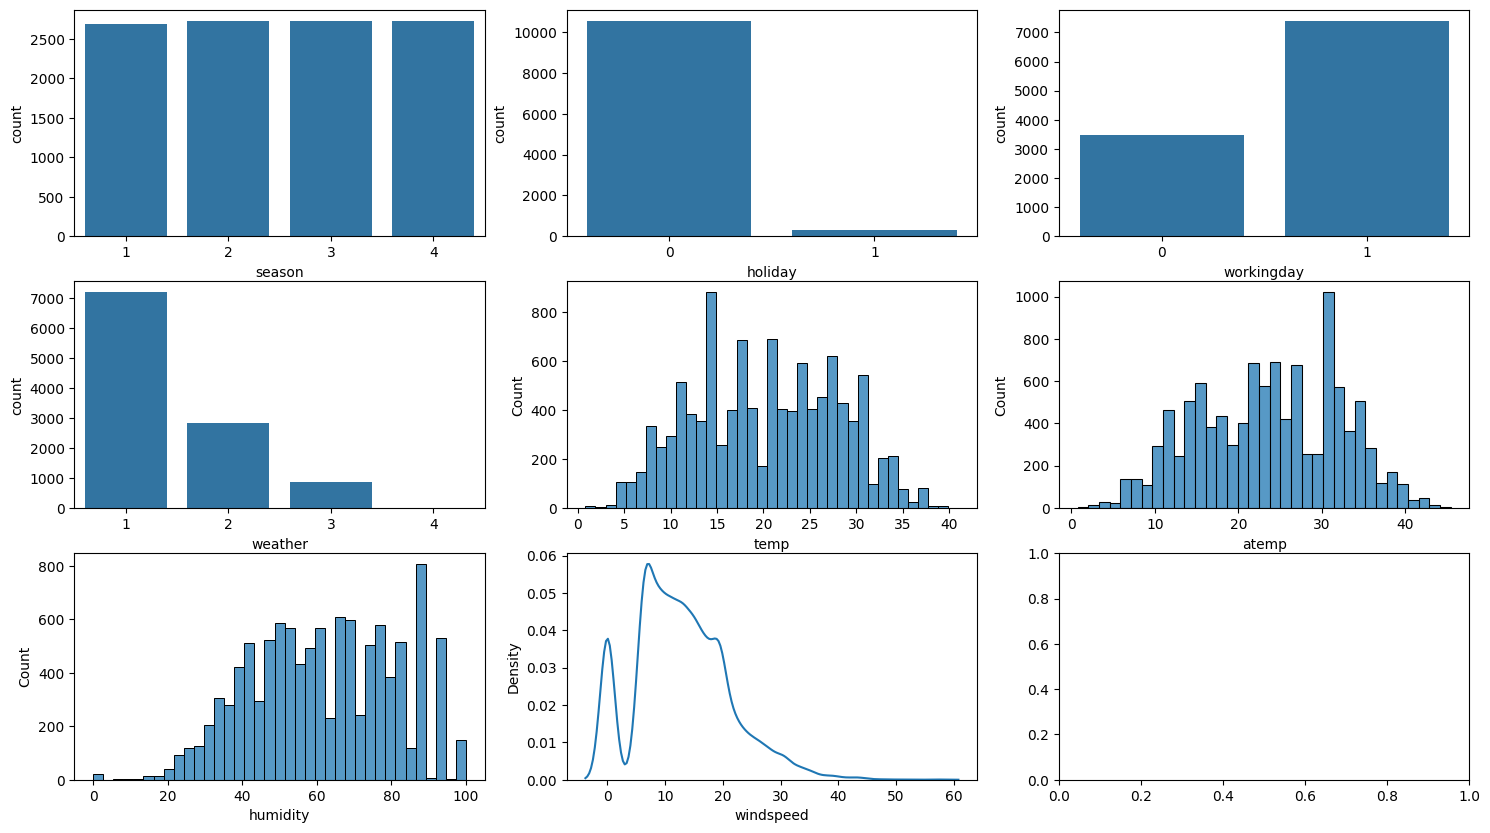

In [ ]:
fig,axs = plt.subplots(nrows = 3, ncols = 3, figsize=(18,10))

sns.countplot(data = df, x = df['season'], ax = axs[0,0])
sns.countplot(data = df, x = df['holiday'],ax = axs[0,1])
sns.countplot(data = df, x = df['workingday'], ax = axs[0,2])
sns.countplot(data = df, x = df['weather'], ax = axs[1,0])
sns.histplot(data = df, x = df['temp'], ax = axs[1,1])
sns.histplot(data = df, x = df['atemp'], ax = axs[1,2])
sns.histplot(data = df, x = df['humidity'], ax = axs[2,0])
sns.kdeplot(data = df , x = df['windspeed'],ax = axs[2,1])

# Outliers

<Axes: xlabel='windspeed'>

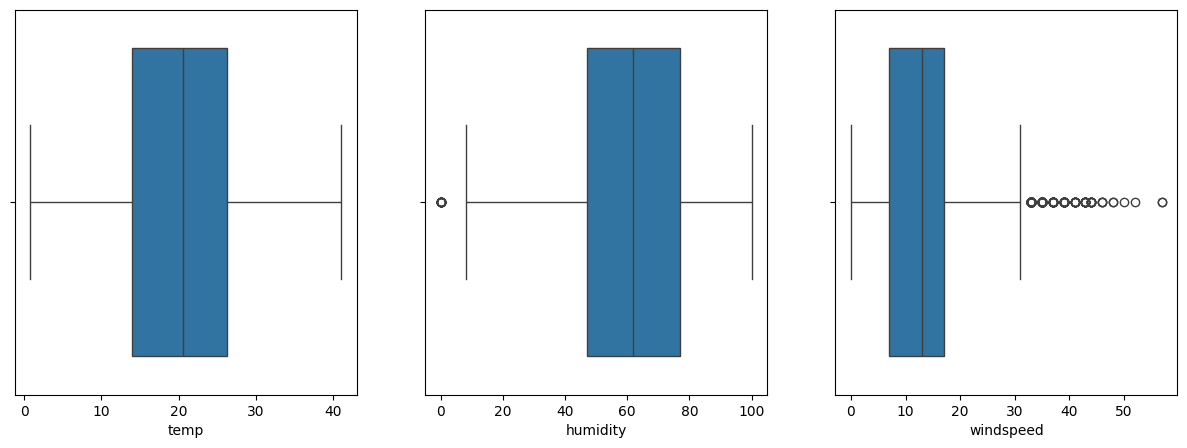

In [ ]:
fig,axs = plt.subplots(nrows = 1, ncols = 3,figsize=(15,5))

sns.boxplot(data = df, x = 'temp',ax = axs[0])
sns.boxplot(data = df, x = 'humidity', ax = axs[1])
sns.boxplot(data = df, x = 'windspeed',ax = axs[2])


#temp and humidy have not any outliers
# Windspeed have few outliers

In [ ]:
df2 = df.copy()

In [ ]:
windspeed25 = np.percentile(df2['windspeed'],25)
windspeed75 = np.percentile(df2['windspeed'],75)
IQR = windspeed75-windspeed25
left_boundary = windspeed25 -1.5 * IQR
right_boundary = windspeed75 + 1.5 * IQR

In [ ]:
windspeed_outliers = df[df['windspeed']>right_boundary].count()
windspeed_outliers

# Numbers of outliers are 227 in this data

,0
datetime,227
season,227
holiday,227
workingday,227
weather,227
temp,227
atemp,227
humidity,227
windspeed,227
casual,227


#Correlation

In [ ]:
df2 = df.drop(['datetime','season','holiday','workingday','weather'],axis = 1)
df2.head()

,temp,atemp,humidity,windspeed,casual,registered,count
0,9.84,14.395,81,0.0,3,13,16
1,9.02,13.635,80,0.0,8,32,40
2,9.02,13.635,80,0.0,5,27,32
3,9.84,14.395,75,0.0,3,10,13
4,9.84,14.395,75,0.0,0,1,1


<Axes: >

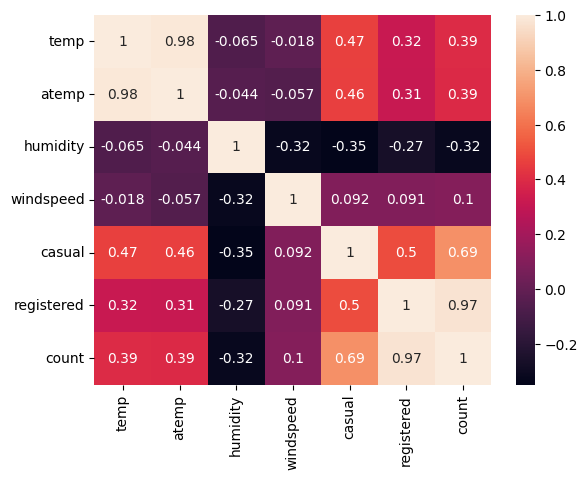

In [ ]:
sns.heatmap(data = df2.corr(), annot = True)

#Tests

In [ ]:
'''
Select an appropriate test to check whether:
Working Day has effect on number of electric cycles rented
No. of cycles rented similar or different in different seasons
No. of cycles rented similar or different in different weather
Weather is dependent on season (check between 2 predictor variable)

Set up Null Hypothesis (H0)
State the alternate hypothesis (H1)

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical
 methods like levene’s test, Shapiro-wilk test (optional)
Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test)
 but double check using visual analysis and report wherever necessary
Set a significance level (alpha)
Calculate test Statistics.
Decision to accept or reject null hypothesis.
Inference from the analysis
'''

'\nSelect an appropriate test to check whether:\nWorking Day has effect on number of electric cycles rented\nNo. of cycles rented similar or different in different seasons\nNo. of cycles rented similar or different in different weather\nWeather is dependent on season (check between 2 predictor variable)\n\nSet up Null Hypothesis (H0)\nState the alternate hypothesis (H1)\n\nCheck assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical\n methods like levene’s test, Shapiro-wilk test (optional)\nPlease continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test)\n but double check using visual analysis and report wherever necessary\nSet a significance level (alpha)\nCalculate test Statistics.\nDecision to accept or reject null hypothesis.\nInference from the analysis\n'

## Workingday vs count

In [ ]:
#df['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


In [ ]:
# We took equal sample for both weekdays and weekends to be more accurate on tests
# We also teted for Variance with the help of Standard deviation
# We have haven't check for normality of the data as this is not necessary to perform T test


weekdays = df[df['workingday'] == 0]['count'].sample(3474)
weekends = df[df['workingday'] == 1]['count'].sample(3474)

print(f"Standard Deviation of weekdays : {weekdays.std()}")
print(f"Standard Deviation of Weekends : {weekends.std()}")

Standard Deviation of weekdays : 173.7240153250001
Standard Deviation of Weekends : 184.10932121495995


In [ ]:
stats.ttest_ind(weekdays, weekends, equal_var = False)

TtestResult(statistic=-1.0281626471439327, pvalue=0.3039092475764368, df=6922.714686344551)

In [ ]:
# We fail to reject the H0

# There is no significant difference in usage of bikes on weekends and weekdays

## Season vs count

In [ ]:
df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [ ]:
spring = df[df['season'] == 1]['count'].sample(2686)
summer = df[df['season'] == 2]['count'].sample(2686)
fall = df[df['season'] == 3]['count'].sample(2686)
winter = df[df['season'] == 4]['count'].sample(2686)

print(f"spring : {stats.shapiro(spring)}")
print(f"summer : {stats.shapiro(summer)}")
print(f"fall : {stats.shapiro(fall)}")
print(f"winter : {stats.shapiro(winter)}")

spring : ShapiroResult(statistic=0.8087378401253585, pvalue=8.749584618867163e-49)
summer : ShapiroResult(statistic=0.9000522611815207, pvalue=9.809292343750583e-39)
fall : ShapiroResult(statistic=0.9146225726161693, pvalue=1.778851579784231e-36)
winter : ShapiroResult(statistic=0.895866332201894, pvalue=2.465648440816163e-39)


In [ ]:
#Checked for all the season none of them are coming from normally distribution
#So instead of Anova test performed an non parametric test i.e Kruskal test

In [ ]:
#H0 : There is no significant difference in all the seasons
#H1 : There is significant difference in all the seasons
#Alpha : 0.5

stats.kruskal(spring,summer,fall,winter)

KruskalResult(statistic=698.5618141295404, pvalue=4.3041983686806196e-151)

In [ ]:
# We are going to reject H0 there is significant difference in number of users in all the seasons

## Weather vs count

In [ ]:
df['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [ ]:
clear = df[df['weather'] == 1]['count'].sample(859)
mist = df[df['weather'] == 2]['count'].sample(859)
light_rain = df[df['weather'] == 3]['count'].sample(859)

print(f"clear : {stats.shapiro(clear)}")
print(f"mist : {stats.shapiro(mist)}")
print(f"light_rain : {stats.shapiro(light_rain)}")

clear : ShapiroResult(statistic=0.8936916551805677, pvalue=6.974985701433807e-24)
mist : ShapiroResult(statistic=0.879807163997722, pvalue=3.1473872832821406e-25)
light_rain : ShapiroResult(statistic=0.7674327906035714, pvalue=3.875893017395983e-33)


In [ ]:
#Checked for all the weathers none of them are coming from normally distribution
#So instead of Anova test performed an non parametric test i.e Kruskal test

In [ ]:
#H0 : There is no significant difference in all the weather
#H1 : There is significant difference in all the weather
#Alpha : 0.5

stats.kruskal(clear,mist,light_rain)

KruskalResult(statistic=129.12712015903898, pvalue=9.128556868325914e-29)

In [ ]:
# We are going to reject H0 there is significant difference in number of users in all the Weather condtions

## Weather vs Season

In [ ]:
weather_vs_season = pd.crosstab(df['weather'],df['season'])
weather_vs_season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
#H0 : There is no significant difference in all the seasons vs weather
#H1 : There is significant difference in all the seasons vs weather
#Alpha : 0.5

stats.chi2_contingency(weather_vs_season)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

#Insights

*   The number of riders is quite consistent across the four seasons.
*   The ridership on non-holidays is significantly higher compared to holidays.
*   The number of riders on working days is nearly double that of riders on weekends.
*   On clear weather days, the highest ridership is observed, with 7,192 riders.
*   In misty weather, the number of riders drops to 2,834.
*   On light rain days, only 859 riders are recorded.
*   Approximately 1.7 million users are registered users.
*   Around 500,000 users are casual users.
*   In total, there are about 2.1 million users overall.


